In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# matplotlib.use('TkAgg')

set_data = pd.read_csv("./data/CAR2023300_set_export.csv", encoding="windows-1252")
set_data["start_date"] = pd.to_datetime(set_data["start_date"])
set_data["end_date"] = pd.to_datetime(set_data["end_date"])

set_data = set_data[['set_number', 'start_date', "end_date"]].dropna()
set_data


,set_number,start_date,end_date
0,1,2023-09-07 18:00:13+00:00,2023-09-07 18:19:37+00:00
1,2,2023-09-07 22:58:58+00:00,2023-09-07 23:17:12+00:00
3,4,2023-09-08 03:43:16+00:00,2023-09-08 04:03:59+00:00
4,5,2023-09-08 06:31:21+00:00,2023-09-08 06:52:07+00:00
5,6,2023-09-08 09:16:39+00:00,2023-09-08 09:37:02+00:00
6,7,2023-09-08 12:09:20+00:00,2023-09-08 12:29:33+00:00
7,8,2023-09-08 15:52:48+00:00,2023-09-08 16:12:44+00:00
8,9,2023-09-08 18:20:37+00:00,2023-09-08 18:40:15+00:00
9,10,2023-09-08 21:39:50+00:00,2023-09-08 21:59:30+00:00
10,11,2023-09-09 00:40:20+00:00,2023-09-09 01:00:04+00:00


In [2]:

# let's start by grabbing the data frame
all_sensor_data = pd.read_csv("./data/CAR2023300_sensor_data.csv", encoding="windows-1252")
# convert the datetime column into pd datetime column
all_sensor_data["datetime"] = pd.to_datetime(all_sensor_data["datetime"])

all_sensor_data

,datetime,from_sentence,type,value,units,annotated display,annotated units
0,2023-09-05 08:04:09+00:00,VTG,true_track,206.60,º,heading,º
1,2023-09-05 08:04:09+00:00,VTG,spd_over_grnd_kts,0.00,kts,speed over ground,kts
2,2023-09-05 08:04:40+00:00,VTG,true_track,206.60,º,heading,º
3,2023-09-05 08:04:40+00:00,VTG,spd_over_grnd_kts,0.00,kts,speed over ground,kts
4,2023-09-05 08:07:15+00:00,VTG,true_track,206.60,º,heading,º
...,...,...,...,...,...,...,...
383431,2023-09-13 04:54:24+00:00,VTG,spd_over_grnd_kts,11.90,kts,speed over ground,kts
383432,2023-09-13 04:54:55+00:00,DPT,true_depth,62.26,m,"depth, true",m
383433,2023-09-13 04:54:55+00:00,DPT,sounder_depth,56.10,m,"depth, transducer",m
383434,2023-09-13 04:54:55+00:00,VTG,true_track,90.20,º,heading,º


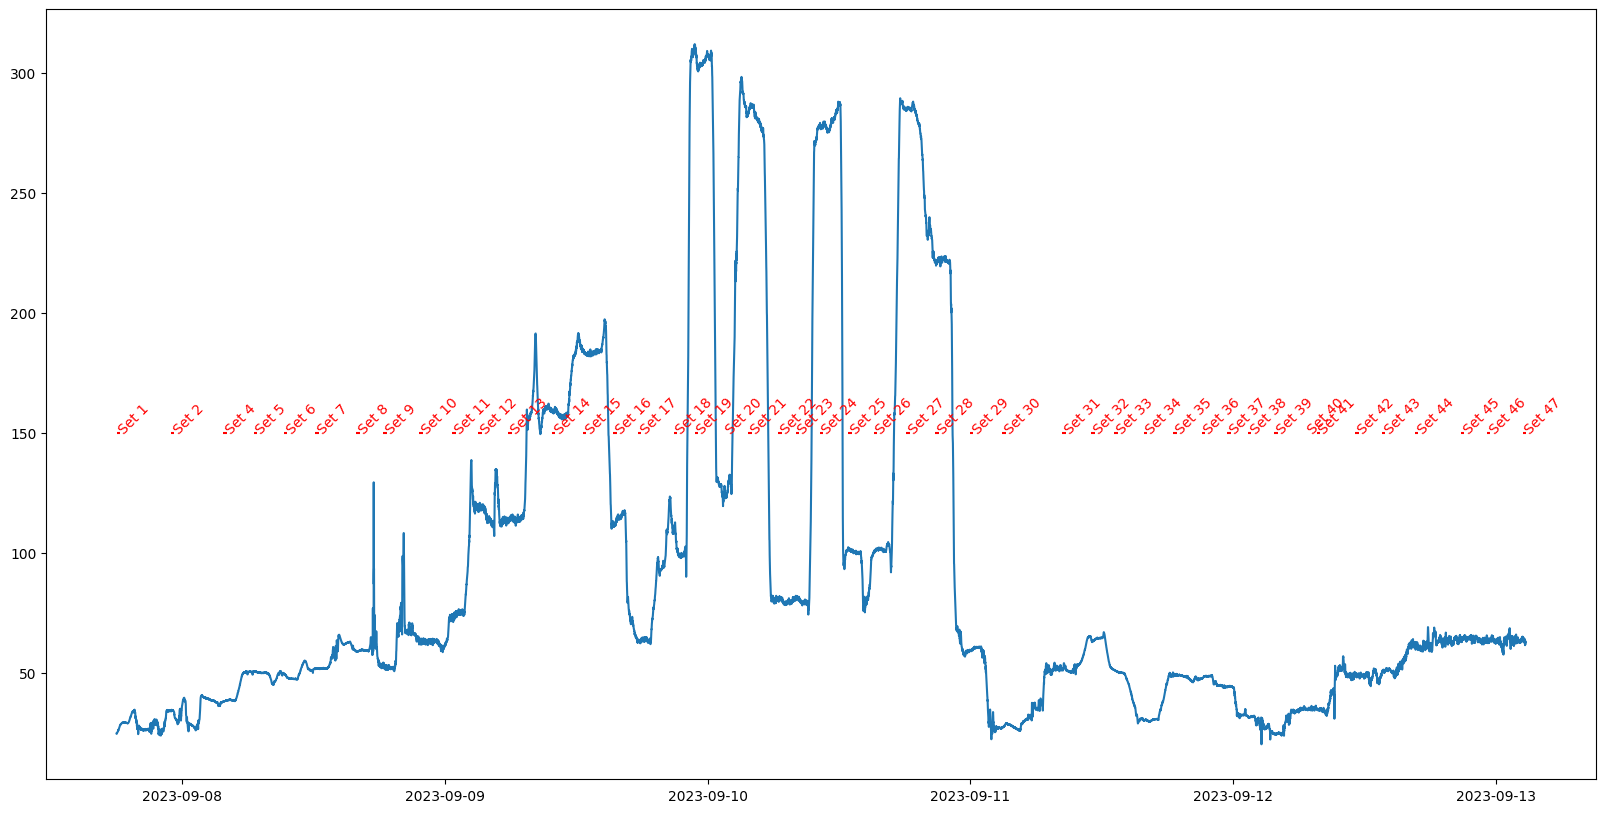

In [3]:
# isolate the depth data and clean up the dataframe

depth_data = all_sensor_data[all_sensor_data['type'] == 'true_depth']
depth_data = depth_data.drop(columns=["from_sentence", 'units', 'annotated display', 'annotated units'])

# %matplotlib inline

# limit the window to the fishing sets
mask = (depth_data["datetime"] > set_data.iloc[0, 1]) & (depth_data["datetime"] < set_data.iloc[-1, 2])
depth_data = depth_data.where(mask).dropna()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(depth_data["datetime"], depth_data["value"])

for index, row in set_data.iterrows():
    plt.hlines(y=150, xmin=row["start_date"], xmax=row["end_date"], color="red")
    ax.annotate(f'Set {row["set_number"]}', (row["start_date"], 150), rotation=45, color="red")

plt.show()

In [70]:
# now let's have a look at the scanmar data
scanmar_data = pd.read_csv("./data/CAR2023300_scanmar_data.csv", encoding="windows-1252")
scanmar_data["datetime"] = pd.to_datetime(scanmar_data["datetime"])

fishing_events = pd.read_csv("./data/CAR2023300_fishing_events.csv", encoding="windows-1252")
fishing_events["created_at"] = pd.to_datetime(fishing_events["created_at"])


,datetime,from_sentence,type,value,units,annotated display,annotated units,set number
0,2023-09-07 17:55:44+00:00,SM2,TS_F,2.00,NaN,"trawl, fish frequency ?",NaN,1
1,2023-09-07 17:55:44+00:00,SM2,TS_H,2.38,NaN,trawl height,m,1
2,2023-09-07 17:55:44+00:00,SM2,CVTLAM_,3.81,NaN,mystery sensor #5,NaN,1
3,2023-09-07 17:55:45+00:00,WST,WST,19.40,C,"temperature, water",ºC,1
4,2023-09-07 17:55:45+00:00,SM2,DVTLAS_R,0.00,NaN,"roll, door (starboard)",º,1
...,...,...,...,...,...,...,...,...
283567,2023-09-13 02:46:58+00:00,SM2,DVTLAM_A,18.00,NaN,mystery sensor #6,NaN,47
283568,2023-09-13 02:46:59+00:00,SM2,DVTLAM_S,13.75,NaN,"spread, door",m,47
283569,2023-09-13 02:46:59+00:00,SM2,TS_F,2.00,NaN,"trawl, fish frequency ?",NaN,47
283570,2023-09-13 02:46:59+00:00,SM2,TS_H,37.38,NaN,trawl height,m,47


IndexError: single positional indexer is out-of-bounds

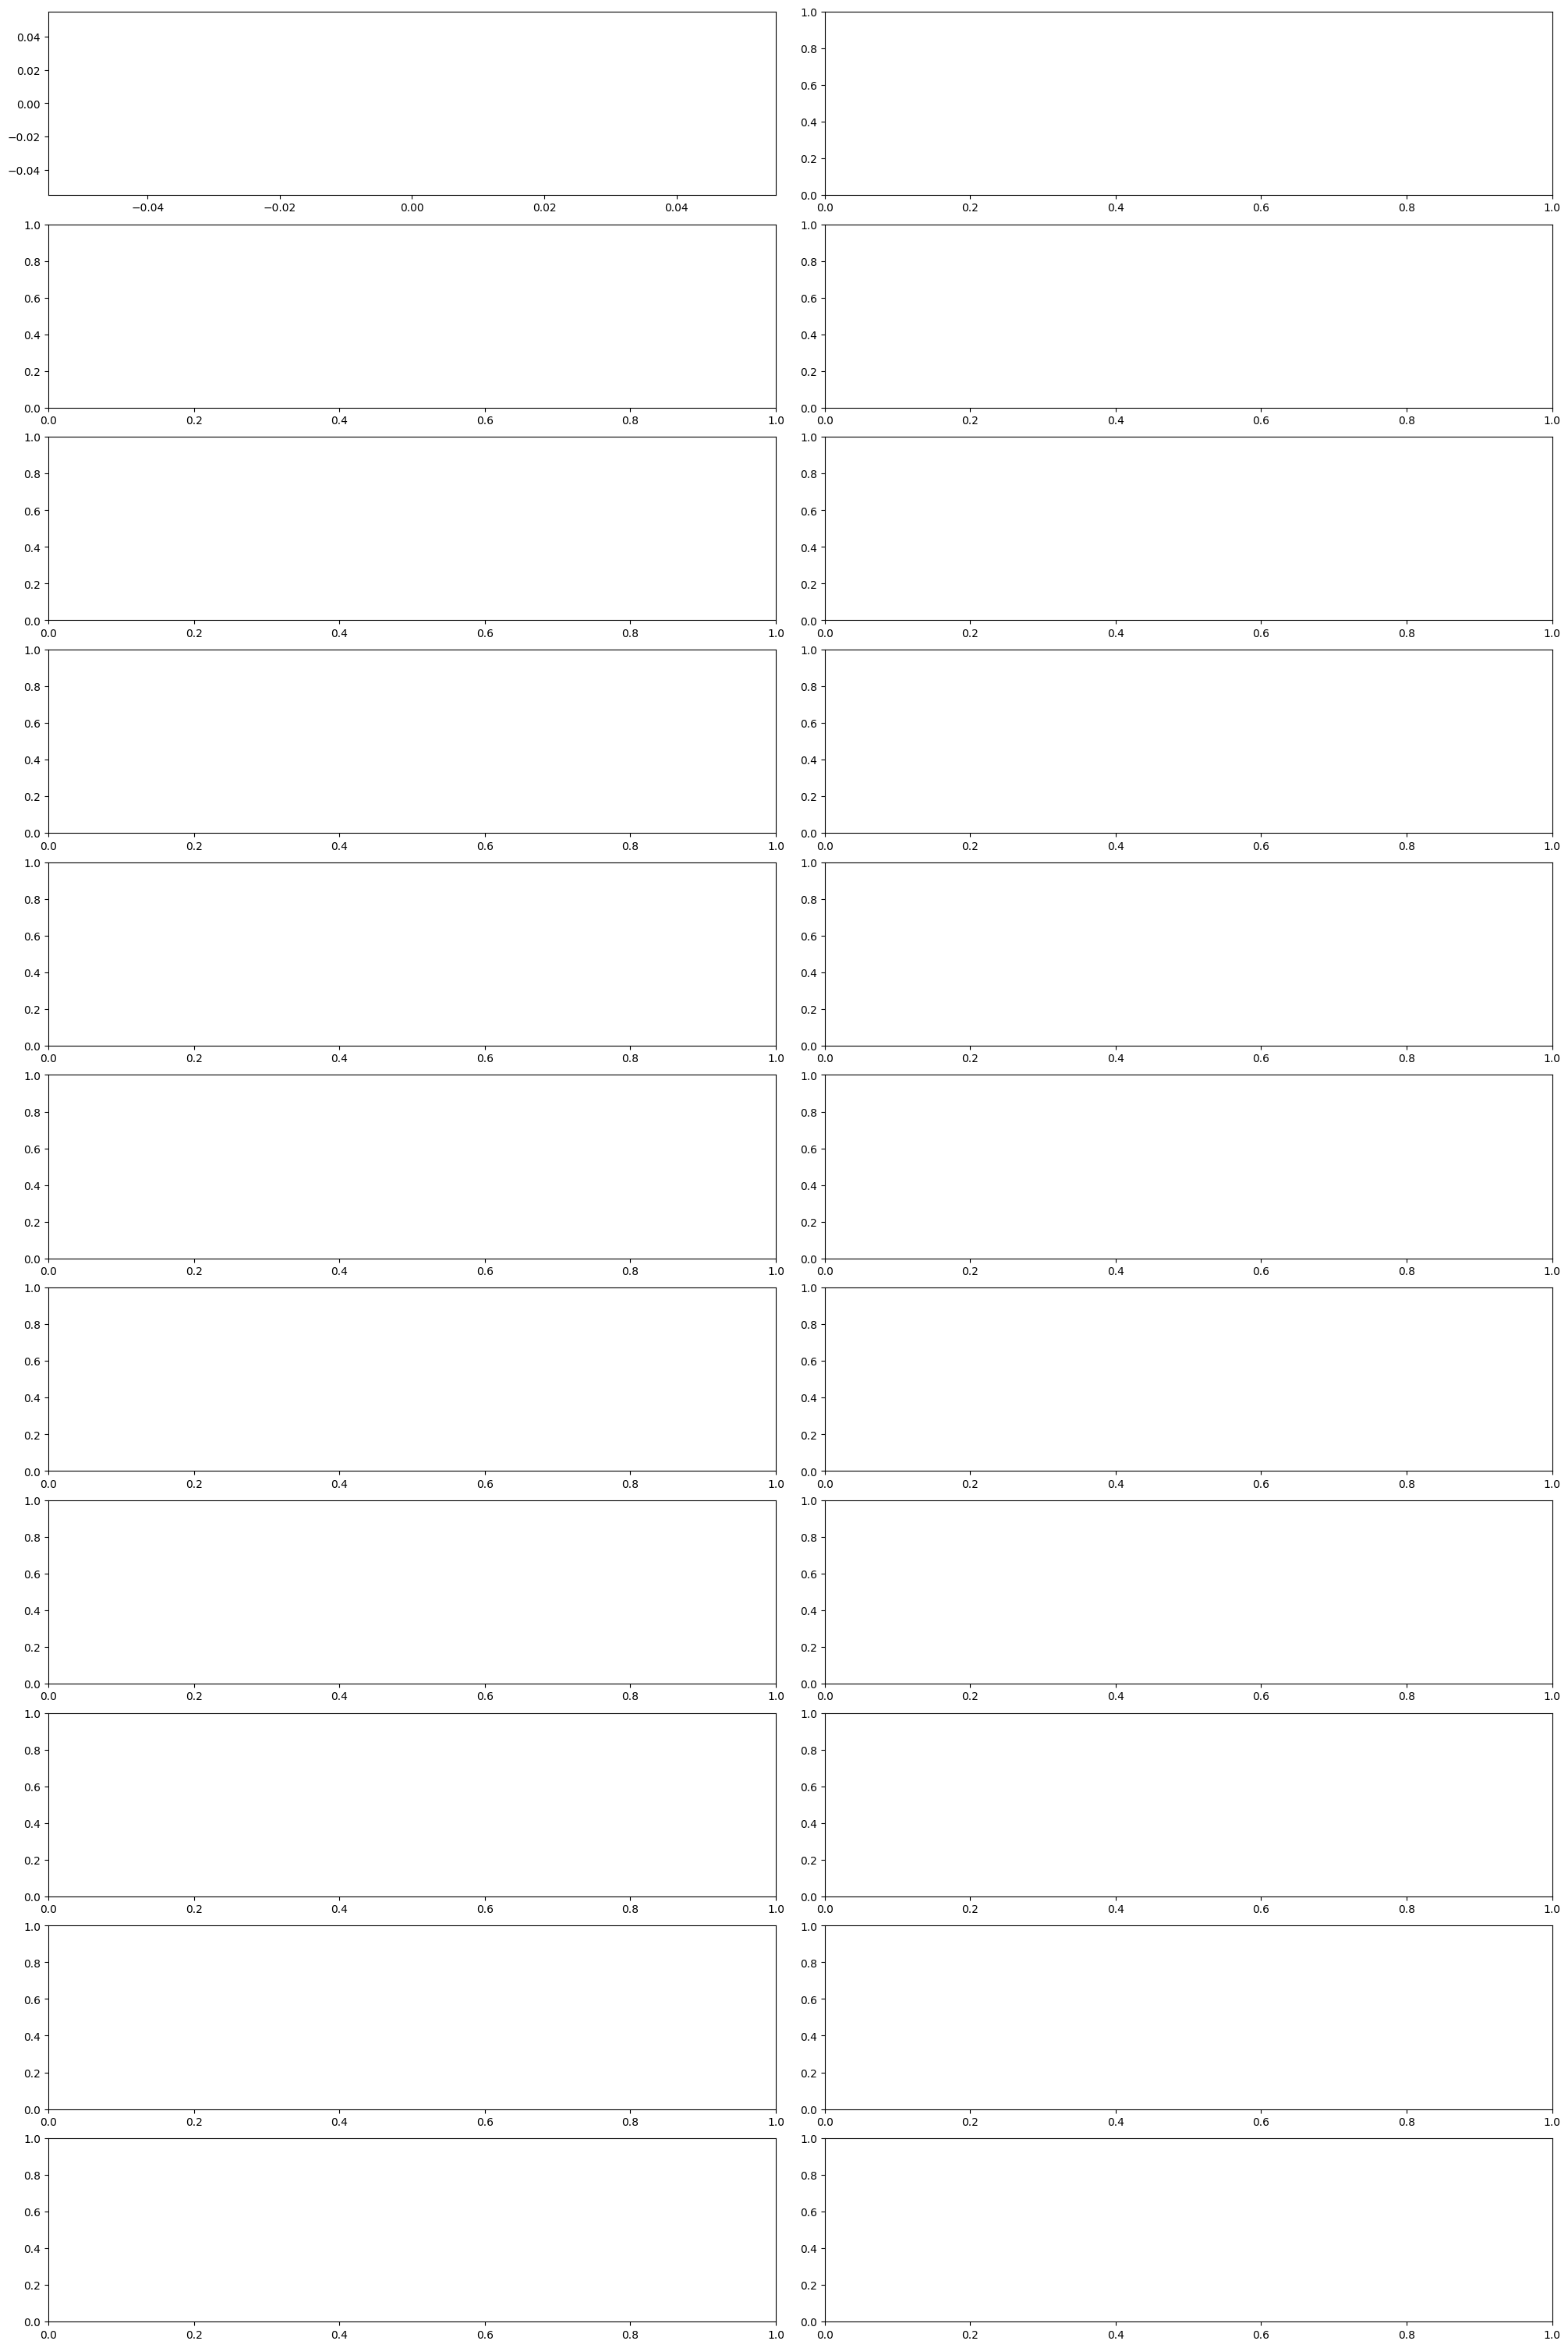

In [69]:
target_set_number = 19
mask = (scanmar_data["set number"] == target_set_number)
scanmar_data = scanmar_data.where(mask).dropna(subset=["set number"])
vars_of_interest = [
    'speed, current (along)',
    'spread, wings (s)',
    'roll, door (starboard)',
    'mystery sensor #6',
    'pitch, door (port)',
    'spread, door',
    'trawl clearance',
    'speed, current (cross)',
    'mystery sensor #7',
    'pitch, door (starboard)',
    'temperature, door #2',
    'depth, door #1',
    'depth, head rope',
    'depth, door #2',
    'roll, door (port)',
    'trawl opening',
    'trawl height',
    'spread, wings (m)',
    'trawl, fish frequency ?',
    'mystery sensor #5',
    'temperature, water',
    'temperature, door #1'
]
axs_rows =math.ceil(len(vars_of_interest)/2)
axs_cols = 2
fig, axs = plt.subplots(axs_rows, axs_cols, figsize=(20, 30),constrained_layout=True)

for var in vars_of_interest:
    index = vars_of_interest.index(var)
    if index < axs_rows:
        ax_row = index
        ax_col = 0
    else:
        ax_row = index-axs_rows
        ax_col = 1
    ax = axs[ax_row, ax_col]
    
    mask = scanmar_data["annotated display"] == var
    tempdata = scanmar_data.where(mask).dropna(subset=["annotated display"])
    ax.plot(tempdata["datetime"], tempdata["value"])
    ax.set_ylabel(tempdata['annotated units'].iloc[0])
    ax.vline(y=0.6 )
    # print(tempdata['type'])
    ax.set_title(var + f" ({tempdata['type'].iloc[0]})")
plt.show()

['trawl, fish frequency ?' 'trawl height' 'mystery sensor #5'
 'temperature, water' 'roll, door (starboard)' 'mystery sensor #6'
 'depth, door #1' 'spread, door' 'temperature, door #2' 'depth, head rope'
 'speed, current (along)' 'roll, door (port)' 'trawl clearance'
 'spread, wings (s)' 'pitch, door (starboard)' 'temperature, door #1'
 'speed, current (cross)' 'mystery sensor #7' 'spread, wings (m)'
 'trawl opening' 'pitch, door (port)' 'depth, door #2']
Index(['datetime', 'from_sentence', 'type', 'value', 'units',
       'annotated display', 'annotated units', 'set number'],
      dtype='object')
